# Homework 4 (Due 10/25/2024 at 11:59pm)


## Name:

## ID:

**Submission instruction:**
- Download the file as .ipynb (see top right corner on the webpage).
- Write your name and ID in the field above.
- Answer the questions in the .ipynb file in either markdown or code cells.
- Before submission, make sure to rerun all cells by clicking `Kernel` -> `Restart & Run All` and check all the outputs.
- Upload the .ipynb file to Gradescope.

## Q1: Boxplot

The following is a boxplot of the `body_mass_g` of the penguins dataset.

Search online and explain the meaning of the lines and dots in a boxplot.


<Axes: xlabel='species', ylabel='body_mass_g'>

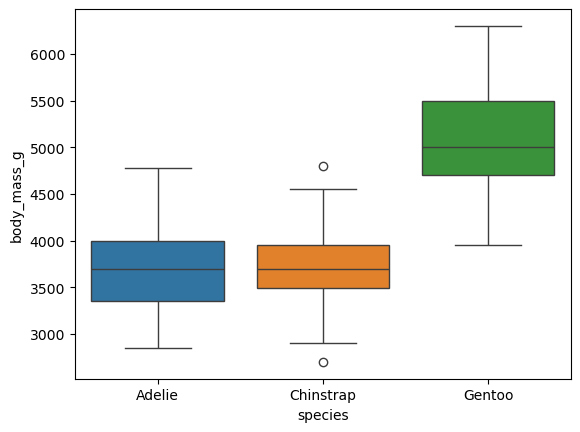

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

penguins = sns.load_dataset('penguins')
sns.boxplot(x='species', y='body_mass_g', data=penguins, hue='species')


- The box represents the interquartile range (IQR), which is the range between the first quartile (25th percentile) and the third quartile (75th percentile).
- The line inside the box represents the median (50th percentile) of the data.
- The lines extending from the box are called whiskers. They extend to the smallest and largest values within 1.5 times the IQR from the first and third quartiles, respectively.
- Dots beyond the whiskers represent outliers, which are data points that fall outside 1.5 times the IQR.

## Working with Time Series Data

Can we predict the future?

For instance, can we use past temperatures to predict future temperatures, or past stock prices to predict future stock prices? These are examples of **time series** data, where there is a natural ordering of the data points based on time, which is different from the penguins dataset.

In the following example, we will use stock price data for Google to explore time series data analysis.

Download the dataset from the [link](./google.csv), obtained from [link](https://www.marketwatch.com/investing/stock/goog/download-data)  This dataset contains the 1-year stock price data for Google. The columns include:

- **Date**: The date of the stock price
- **Open**: The opening price of the stock
- **High**: The highest price of the stock
- **Low**: The lowest price of the stock
- **Close**: The closing price of the stock
- **Volume**: The volume of stocks traded

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('google.csv', thousands=',')
# note: some datasets use a comma as a decimal separator, for example '1,000,000'. 
# the 'thousands' parameter will remove the comma and convert the string to a number

### Q2: Handling Date and Time Data

Dates are usually represented as strings in various formats, such as '2024-10-15', '2024/10/15', '15-Oct-2024', etc. However, dates have an inherent order, and to work effectively with dates in Python, we use a special data type called **datetime**.

The following code convert the raw date strings to datetime objects.


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

This conversion allows us to perform operations on dates, such as comparing them.

In [5]:
df['Date'] > '2024-10-15'

0       True
1       True
2      False
3      False
4      False
       ...  
248    False
249    False
250    False
251    False
252    False
Name: Date, Length: 253, dtype: bool

(1) Find the mean, standard deviation, minimum, and maximum of the closing price of the stock in January 2024.

In [6]:
df.loc[(df['Date'] >= '2024-01-01') & (df['Date'] < '2024-02-01'), 'Close'].describe()

count     21.000000
mean     145.425714
std        5.342295
min      137.390000
25%      141.800000
50%      144.080000
75%      148.680000
max      154.840000
Name: Close, dtype: float64

(2) Find the date on which the highest stock price (“High”) occurred, and determine the corresponding opening and closing prices for that day.

In [7]:
df_highest = df.loc[df['High'].idxmax()]
print(f"Date: {df_highest['Date']}, Open: {df_highest['Open']}, Close: {df_highest['Close']}")

Date: 2024-07-10 00:00:00, Open: 190.75, Close: 192.66


(3) Sort the dataframe based on the date in ascending order. That is, the first row is the earliest date, and the last row is the latest date.

In [8]:
# sort row by date
df.sort_values(by='Date', ascending=True, inplace=True)

## Q3: Moving Average

**Moving average** is a common technique used in time series analysis to smooth out short-term fluctuations and highlight longer-term trends.

Given a sequence of numbers $x_1, x_2, x_3, \ldots, x_n$, the moving average with window size $k$ is defined as:

$$
\text{MA}_i = \frac{1}{k} \sum_{j=i-k+1}^{i} x_j
$$

for $k \leq i \leq n$. We can define $\text{MA}_i = \text{NaN}$ for $i < k$. (There are different ways to define the boundary cases, but we will use this definition for simplicity.)

For example, given the sequence $[1, 2, 3, 4, 5]$ and $k=3$, the moving average sequence is $[\text{NaN}, \text{NaN}, 2, 3, 4]$.

Plot the 'Close' price of the stock and the 7-day moving average of the 'Close' price. The final plot is provided as an example.

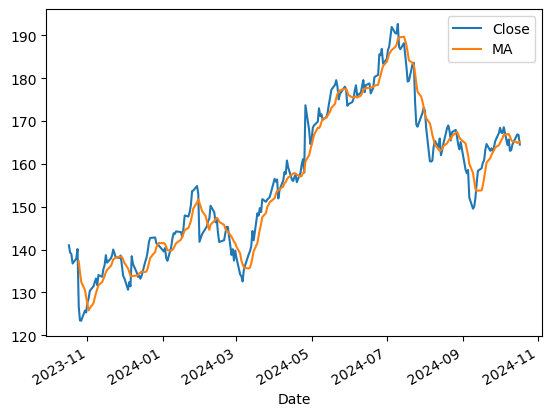

In [9]:
df['MA'] = df['Close'].rolling(window=7).mean()
fig = df.plot(x='Date', y=['Close', 'MA'])

## Q4:

(1) Create a new column called 'Range' that calculates the difference between the 'High' and 'Low' prices of the stock for each day.

(2) Create pairwise scatter plot (`seaborn.pariplot`) of the 'Close', 'Volume', and 'Range' columns. 

(3) Create a heatmap of the correlation matrix of the 'Close', 'Volume', and 'Range' columns.

In [10]:
df['Range'] = df['High'] - df['Low']

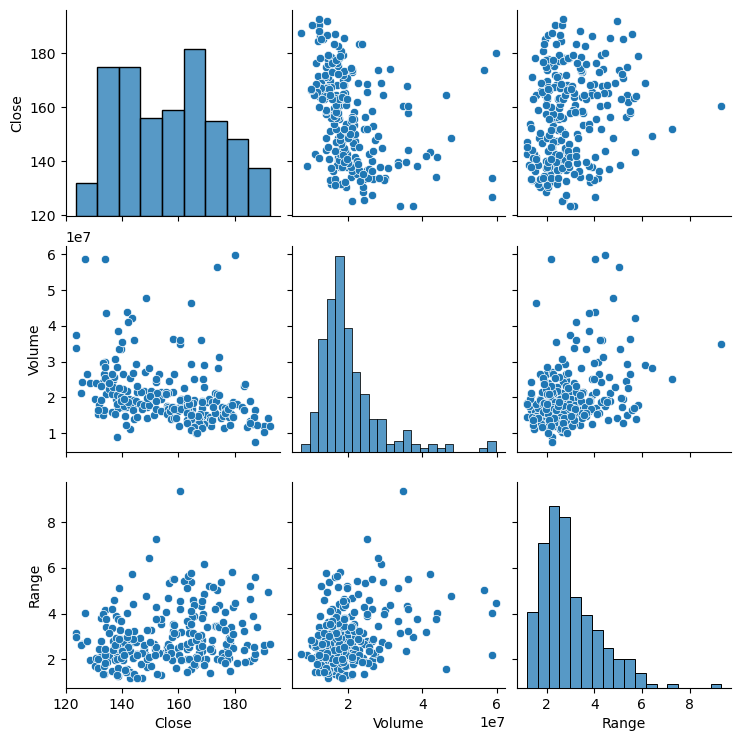

In [11]:
fig = sns.pairplot(df[['Close', 'Volume', 'Range']])

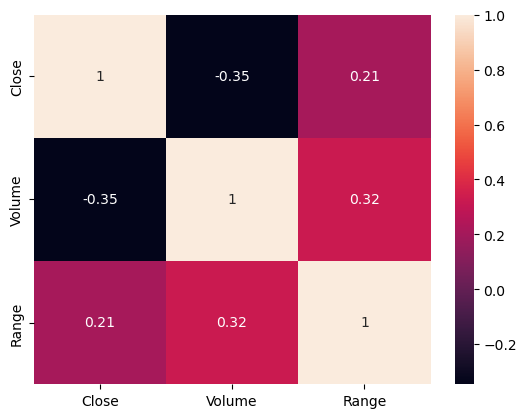

In [16]:
correlation = df[['Close','Volume', 'Range']].corr()
# heatmap
fig = sns.heatmap(correlation, annot=True)

## Q5:

Sometimes, instead of looking at the absolute stock price, we are interested in the **percentage change** in the stock price from one day to the next.

(1) Create a new column called 'percent_change', which is the percentage change of the 'Close' price of the stock from the previous day.

For example, if the close price of the stock is [100, 110, 100], then the percentage change is [NaN, 0.1, -0.0909] (there is no percentage change for the first day).

(2) Plot a histogram of the percentage changes.

In [13]:
df['percent_change'] = df['Close'].pct_change()

<Axes: xlabel='percent_change', ylabel='Count'>

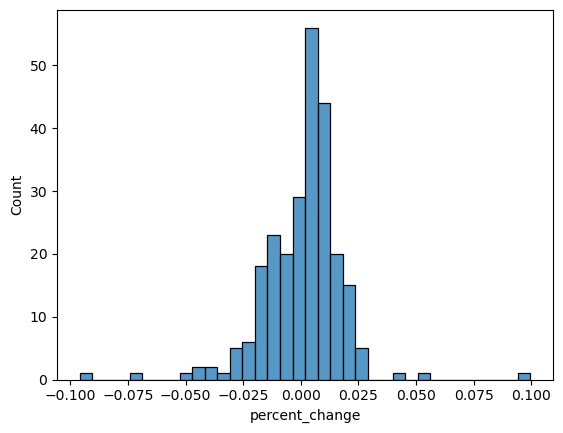

In [14]:

sns.histplot(df['percent_change'])

**(3) Challenge, not graded**

For time series data, one common question is whether there is "momentum" in the data. For example, in basketball, if a player made the last two shots, is it more likely that they will make the next shot? Similarly, for stock prices, if the price increased yesterday, is it more likely that it will increase today?

Plot the scatter plot of the 'percent_change' of one day and the 'percent_change' of the next day. And calculate the correlation between the two. Does the results show any momentum in the stock price?


-0.01217302521963894


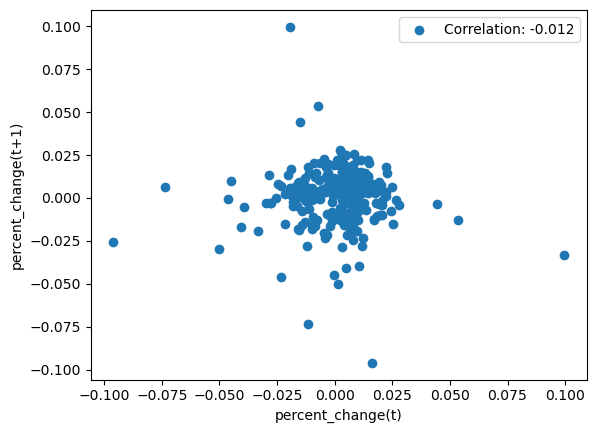

In [15]:
import numpy as np

all = df['percent_change'].values
x = all[1:-1]
y = all[2:]

momentum_corr = np.corrcoef(x, y)[0, 1]
print(momentum_corr)

# show first 3 digit of the correlation
plt.scatter(x, y, label=f'Correlation: {momentum_corr:.3f}')
plt.xlabel('percent_change(t)')
plt.ylabel('percent_change(t+1)')
plt.legend()

# The correlation is close to 0, which suggests no evidence of momentum in the stock price from one day to the next.